# IMPORT Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## Import dataset

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
X=df.iloc[:,3:].values

# Dendrogram to find optimal number of clusters

Text(0, 0.5, 'euclidean distance')

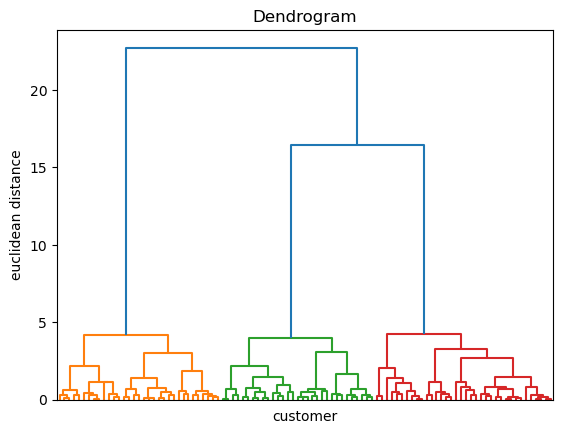

In [23]:
import scipy.cluster.hierarchy as sch
dondogram=sch.dendrogram(sch.linkage(X,method='ward',metric='euclidean'),no_labels=True)
plt.title('Dendrogram')
plt.xlabel('customer')
plt.ylabel('euclidean distance')

# Building final hc model

In [6]:
from sklearn.cluster import AgglomerativeClusterin
hc = AgglomerativeClustering(n_clusters=5)
hc.fit(X)

AgglomerativeClustering(n_clusters=5)

In [8]:
hc.n_clusters_

5

In [14]:
df.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


# Visualising the clusters

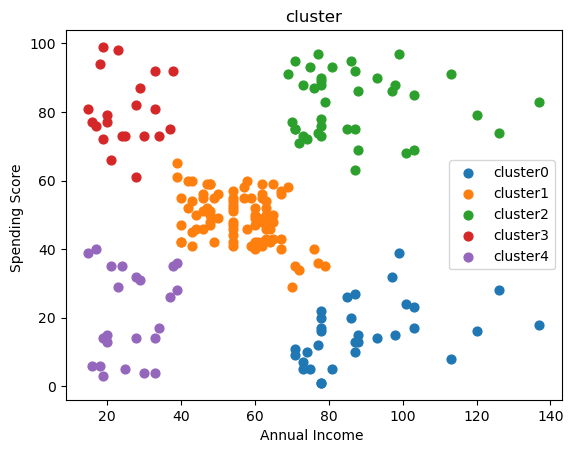

In [17]:
for i in range (hc.n_clusters_):
    plt.scatter(X[hc.labels_== i,0 ],X[hc.labels_== i,1 ],s=40,label="cluster"+str(i))
plt.title("cluster")
plt.xlabel("Annual Income ")
plt.ylabel("Spending Score ")
plt.legend()

In [11]:
X[hc.labels_== 0,0 ]

array([ 71,  71,  73,  73,  74,  75,  77,  78,  78,  78,  78,  78,  78,
        81,  85,  86,  87,  87,  87,  88,  88,  93,  97,  98,  99, 101,
       103, 103, 113, 120, 126, 137], dtype=int64)

In [50]:
from sklearn.metrics import adjusted_rand_score
accuracy = adjusted_rand_score(labels_true=X[:,0],labels_pred=X[:,1])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


1.0

# Sample ex

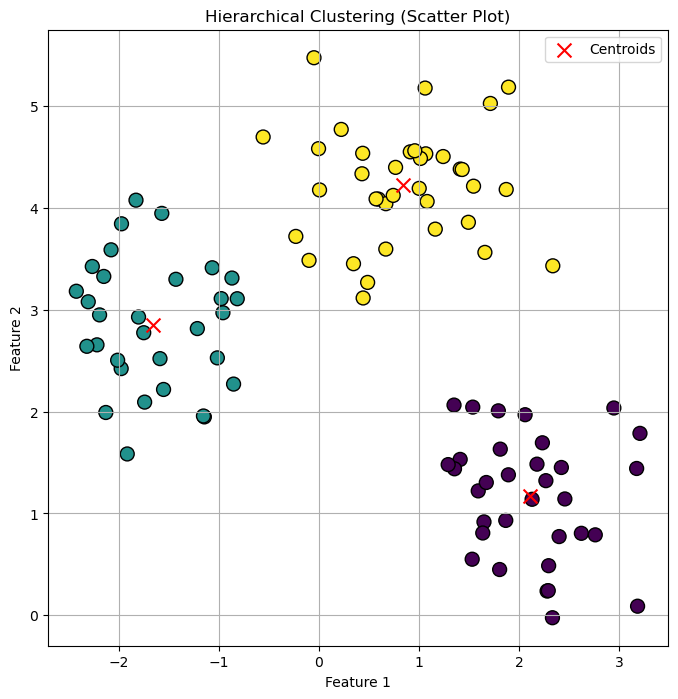

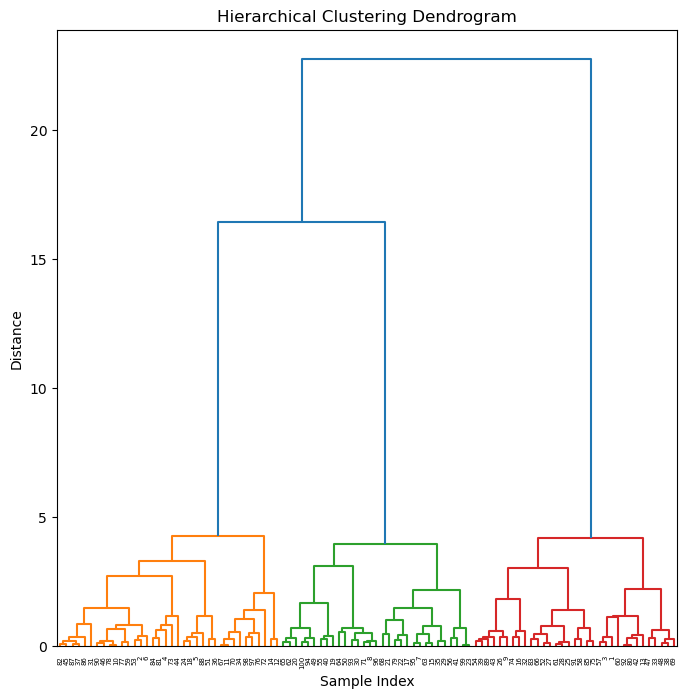

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

# Step 1: Prepare the Data
# Generate synthetic data
n_samples = 100
X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.60, random_state=0)

# Step 2: Perform Hierarchical Clustering
linked = linkage(X, method='ward')

# Step 3: Create Cluster Labels
# You can choose a threshold to cut the dendrogram
# Here we use 3 clusters
clusters = fcluster(linked, t=3, criterion='maxclust')

# Step 4: Visualize the Results
plt.figure(figsize=(8, 8))

# Scatter plot of the data points colored by cluster
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)

# Plotting the centroids
centroids = np.array([X[clusters == i].mean(axis=0) for i in range(1, 4)])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

plt.title('Hierarchical Clustering (Scatter Plot)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Dendrogram for additional visualization
plt.figure(figsize=(8, 8))
dendrogram(linked, orientation='top', labels=np.arange(1, n_samples + 1), 
           distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()